## Week 1 & 2: Assignment by Florian Kahrs
### Development of a Model to Predict Mean Steps per FitBit User

### Introduction

This Notebook aims to report the process of the development of learning data cleaning, exploratory analysis, correlation, and linea regression in Python. As this project shall be an introduction into machine learning, the purpose of this content is to develop a predictive model of how many steps a certain FitBit User will walk each day.

### Data Cleaning

The following section aims to import, merge, and clean he relevant datafiles. After importing relevant libraries, reading in both formats, and checking for impossible valies, these shall be altered.

In [85]:
#import of relevant libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Reading of relevant data formats and setting the right delimiters
df_steps = pd.read_csv("steps.csv", delimiter=";")
df_survey = pd.read_csv("survey.csv")

#Merging both Datasets on the "ID" Column
df_merged = pd.merge(df_survey, df_steps, on = 'id')

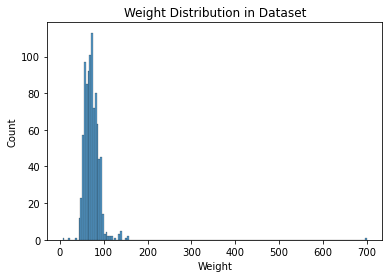

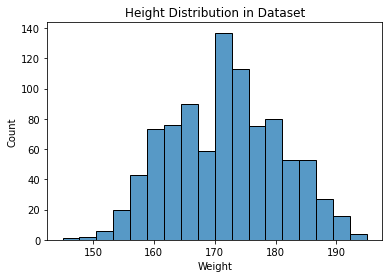

In [86]:
#Checking Weight Distribution for Errors
sns.histplot(df_merged['weight'])
plt.title('Weight Distribution in Dataset')
plt.xlabel('Weight')
plt.show()

#Graph shows some irregular values above 300 and approximately below 40.

#Checking Height Distribution for Errors
sns.histplot(df_merged['height'])
plt.title('Height Distribution in Dataset')
plt.xlabel('Weight')
plt.show()

#Graph shows no irregular or impossible Values

In [87]:
#Adjustment of Impossible Values by Developing a Function that checks for irregular entries
def weight_adjustment(x):
    if x > 300.0 or x<40.0:
        return float("NaN")
    else:
        return x

df_merged['weight'] = df_merged['weight'].apply(weight_adjustment)
df_merged.head()

,id,city,gender,age,hh_size,education,education_1,height,weight,20-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,NaN,...,3914.0,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [88]:
#Variable Creation "Mean Steps" - For the Model Development, the Mean Number or Average is inevitable.
# This cell therefore aims create the variable
df_merged["Mean Steps"] = df_merged.iloc[:,9:337].mean(axis=1).round(0)

In [89]:
#The Mean Variable contains impossible values. Mean Values above 40,000 will therefore not be considered.
def step_adjustment(x):
    if x > 40000:
        return float("NaN")
    else:
        return x

df_merged['Mean Steps'] = df_merged['Mean Steps'].apply(step_adjustment)
df_merged.head()

,id,city,gender,age,hh_size,education,education_1,height,weight,20-6-2013,...,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014,Mean Steps
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10206.0
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5687.0
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,NaN,...,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN,8302.0
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3633.0
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5312.0


### Exploratory Data Analysis

Upon data cleaning, preparation, and removal of impossible values, this section shall aim to become more aquainted with the merged dataset. Hence, descriptive statistics, and basic relations and differences mong categories will be projected.

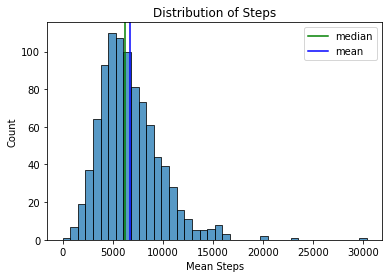

The median Number of Steps of the Sample Group is: 6242.5 Steps
The mean Number of Steps of the Sample Group is: 6729.67136659436 Steps


In [90]:
sns.histplot(df_merged['Mean Steps'].dropna(), kde=False)
plt.title('Distribution of Steps')
plt.axvline(median_size, 0, 100, color='green', label='median') 
plt.axvline(mean_size, 0, 100, color='blue', label='mean') 
plt.legend() 
plt.show()

mean_size = df_merged['Mean Steps'].mean()
median_size = df_merged['Mean Steps'].median()

print(f'The median Number of Steps of the Sample Group is: {median_size} Steps')
print(f'The mean Number of Steps of the Sample Group is: {mean_size} Steps')


The exploratory data analysis shows that the mean step data is despite a few outliers normally distributed and a little right skewed. The media, which in this case is the more precise measure of central tendency are 6729 steps per day whereas the median are 6242 steps per day. In terms of modality, there is a ingle peak. Lastly, in terms of outliers, there had been one value above 70,000. This value ad been removed as the data came from a single day. As a result, remaining outliers (n=4) are not to uncommon and were deemed possible.

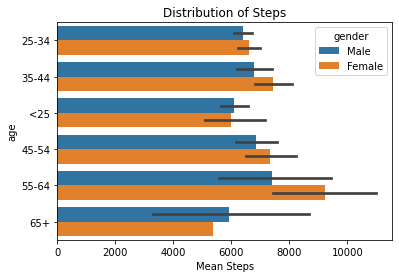

In [91]:
#Showing the Distribution of Steps by Categories
sns.barplot(x=df_merged['Mean Steps'].dropna(), y=df_merged['age'].dropna(), hue=df_merged['gender'].dropna())
plt.title('Distribution of Steps')
plt.show()

The barplot shows that age and gender have a potential impact and the average number of steps per day. Hence, whereas the group of people aged 55-64 had the most steps, the 65+ group had the least average.Aditionally it is shown that in this sample women tend in most cases, depending on their age group have a higher numebr of everage steps per day. In terms of valididty of these results, the confidence interval reveals that these results may not be statistically relevant, thus may not be used for predictive analyses.

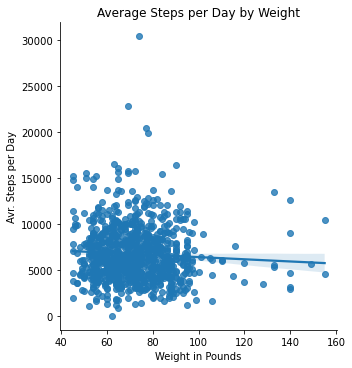

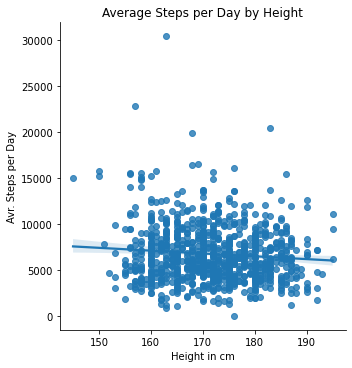

In [92]:
#Depicting the Relation of Average Steps per Day and Weight/ Height
sns.lmplot(x='weight', y='Mean Steps', fit_reg=True, data=df_merged) 
plt.xlabel('Weight in Pounds') 
plt.ylabel('Avr. Steps per Day')
plt.title('Average Steps per Day by Weight')
plt.show()

sns.lmplot(x='height', y='Mean Steps', fit_reg=True, data=df_merged) 
plt.xlabel('Height in cm') 
plt.ylabel('Avr. Steps per Day')
plt.title('Average Steps per Day by Height')
plt.show()

In [93]:
#sns.heatmap(xticklabels=corr.columns, yticklabels=corr.columns) #the last two arguments set the column names
#plt.show()
#Calculating the Correlations
corr = df_merged[['Mean Steps', 'weight', "height"]].corr()
corr

,Mean Steps,weight,height
Mean Steps,1.000000,-0.060210,-0.091417
weight,-0.060210,1.000000,0.508194
height,-0.091417,0.508194,1.000000


As visible in the above three depicted charts, the relation between the Mean Steps per day and the Weight and Height of the sample group is narrow. Hence, there is no correlation between Steps taken per Day and Height and only a very slightly negative correlation between weight and mean steps taken per day.

### Predictive Model Development

A regression in statistics describes the relationship between two or more variables. One can distinguish between independent variables (predictors) and dependent variables (criteria). With the regression one can thus make predictions about the criterion.
The following section shall create such a model for the Mean Number of Steps taken based on Weight and Height.

In [112]:
from sklearn.linear_model import LinearRegression
df_merged2 = df_merged.fillna(0)
#df_merged2 = df_merged.fillna(df_merged.mean(), inplace=True) This is a try to get rid of NAN, but not putting in a zero, but instead the mean.

x = df_merged2[["Mean Steps"]]
y = df_merged2["height"]
lm = LinearRegression()
lm = lm.fit(x, y)

### Evaluating the Fit

In [113]:
#R^2 Analysis
df_merged2['Mean Steps_p'] = lm.predict(x) 
df_merged2.head(10)

,id,city,gender,age,hh_size,education,education_1,height,weight,20-6-2013,...,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014,Mean Steps,Mean Steps_p
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,3642.416667,...,8434.303571,9870.107143,7209.693878,9570.690141,7614.848837,6805.925926,7505.530303,0.0,10206.0,170.720589
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,3642.416667,...,8434.303571,9870.107143,7209.693878,9570.690141,7614.848837,6805.925926,7505.530303,0.0,5687.0,171.952296
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,3642.416667,...,8434.303571,9870.107143,7209.693878,6227.000000,4567.000000,2567.000000,1129.000000,0.0,8302.0,171.239547
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,3642.416667,...,8434.303571,9870.107143,7209.693878,9570.690141,7614.848837,6805.925926,7505.530303,0.0,3633.0,172.512137
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,3642.416667,...,8434.303571,9870.107143,7209.693878,9570.690141,7614.848837,6805.925926,7505.530303,0.0,5312.0,172.054506
5,6,Lille,Male,35-44,1,1,Vocational,170.0,63.0,3642.416667,...,8434.303571,9870.107143,7209.693878,9570.690141,7614.848837,6805.925926,7505.530303,0.0,11909.0,170.256417
6,7,Montpellier,Male,25-34,2,2,Master or doctorate,175.0,75.0,3642.416667,...,8434.303571,9870.107143,7209.693878,9570.690141,7614.848837,6805.925926,7505.530303,0.0,4715.0,172.217226
7,8,Bordeaux,Female,25-34,3,4,Master or doctorate,165.0,88.0,3642.416667,...,8434.303571,9870.107143,7209.693878,9570.690141,7614.848837,6805.925926,7505.530303,0.0,3594.0,172.522767
8,9,Lille,Female,35-44,4,4,Vocational,172.0,69.0,3642.416667,...,11731.000000,14151.000000,7209.693878,3996.000000,2556.000000,302.000000,2442.000000,0.0,8627.0,171.150964
9,10,Lille,Female,25-34,2,2,Master or doctorate,165.0,93.0,3642.416667,...,8434.303571,9870.107143,7209.693878,9570.690141,7614.848837,6805.925926,7505.530303,0.0,3787.0,172.470163


In [114]:
from sklearn.metrics import r2_score
r2_score(df_merged2['Mean Steps'], df_merged2['weight'])


-4.811359969299674

In [115]:
r2_score(df_merged2['Mean Steps'], df_merged2['height'])

-4.6687797610192465

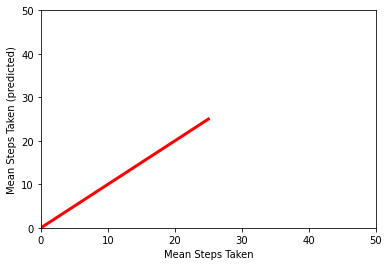

In [116]:
sns.scatterplot(x='Mean Steps',y='height',data=df_merged2)
plt.xlim(0, 50) #This sets the x-axis limits to (0, 5e10 = 5000000000)
plt.ylim(0, 50) #Ditto for y-axis. I want both axes to have the same length, so we can compare them
plt.plot([0, 25], [0, 25], color='red', lw=3) #This draws the straight red line, you can leave this out if you wish
plt.xlabel('Mean Steps Taken')
plt.ylabel('Mean Steps Taken (predicted)')
plt.show()

## Evaluation and Conclusion

During the devlopment of this linea regression, there have been two identified issues that prevent me from accurately predicting steps taken. Firstly, the (missing) correlation of weight/height and Mean Steps shows that both varables have little impact on steps taken per day. Consequently, using solely these two variable for prediction is impossible. Given th extra challenge in the assignment of including the categorical variable "Gender" in the regression, this may have resulted in a better fit. The problem here is that the caegorical variable needs to be transformed. My first idea would be to use a dummy variable which would then need to be concatenated with the original dataset again. Given the exploratory data analysis, we see significant differences between male and female and partially significant differences between age categories. Including both categorical variables would certainly result in a better model, yet unfortunately, I miss the coding knowledge to do so.

The second issue that results in a failed regression analysis is the fact that participants have not always worn their deveice and steps taken per day are not given for every day. The resulting NaN values therefoe provide certain problems. Amjad tried to help me on this by dropping these numbers and replacing them with 0, so that the model works, yet I argue that this massively falsifies the data as the mean calculation now also includes the 0. As a result, the regression fails to predict steps. I tried to use the mean of the column as a replacement for missing values, yet also this did not seem to work. A piece of code that ignores missing values would therefore be required.

As of now, the model is predicting worse than the mean of the target values.